In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.naive_bayes import BernoulliNB


In [ ]:

df = pd.read_csv('/content/drug200.csv')
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
# Check the null values
print("Number of null values:",df.isnull().sum())

# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Check the shape
print("Shape:", df.shape)

Number of null values: Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64
Number of duplicate rows: 0
Shape: (200, 6)


In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
    print(df.head())

   Age  Sex      BP Cholesterol  Na_to_K   Drug
0   23    0    HIGH        HIGH   25.355  DrugY
1   47    1     LOW        HIGH   13.093  drugC
2   47    1     LOW        HIGH   10.114  drugC
3   28    0  NORMAL        HIGH    7.798  drugX
4   61    0     LOW        HIGH   18.043  DrugY
   Age  Sex  BP Cholesterol  Na_to_K   Drug
0   23    0   0        HIGH   25.355  DrugY
1   47    1   1        HIGH   13.093  drugC
2   47    1   1        HIGH   10.114  drugC
3   28    0   2        HIGH    7.798  drugX
4   61    0   1        HIGH   18.043  DrugY
   Age  Sex  BP  Cholesterol  Na_to_K   Drug
0   23    0   0            0   25.355  DrugY
1   47    1   1            0   13.093  drugC
2   47    1   1            0   10.114  drugC
3   28    0   2            0    7.798  drugX
4   61    0   1            0   18.043  DrugY
   Age  Sex  BP  Cholesterol  Na_to_K  Drug
0   23    0   0            0   25.355     0
1   47    1   1            0   13.093     3
2   47    1   1            0   10.114     3
3 

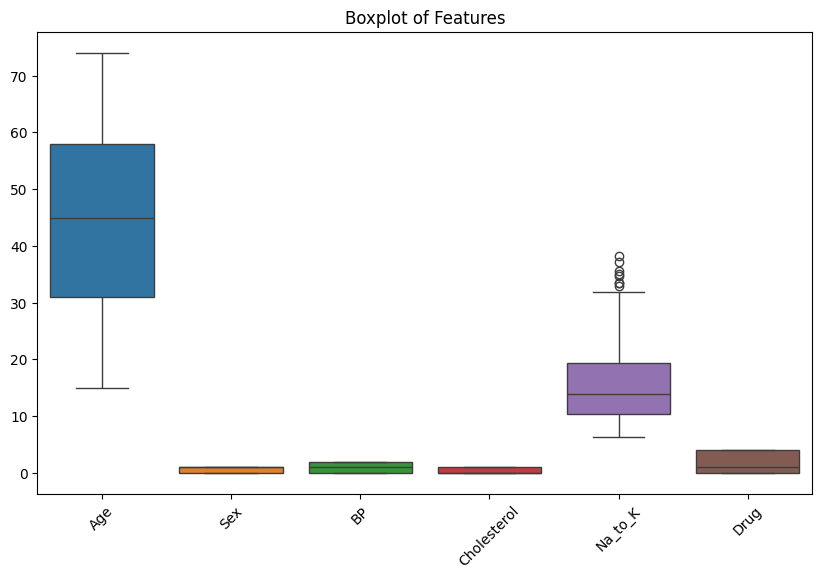

In [ ]:
# Check for outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.show()

In [ ]:
from scipy.stats import zscore

# Extract numerical columns for z-score calculation
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate z-scores for numerical columns
z_scores = zscore(df[numerical_cols])

# Calculate absolute z-scores
abs_z_scores = np.abs(z_scores)

# Set the threshold for outliers
threshold = 3

# Create a mask for outliers
outliers_mask = (abs_z_scores > threshold).any(axis=1)

# Filter out rows without outliers
df1 = df[~outliers_mask]

# Display cleaned dataset
print(df1.head())


   Age  Sex  BP  Cholesterol  Na_to_K  Drug
0   23    0   0            0   25.355     0
1   47    1   1            0   13.093     3
2   47    1   1            0   10.114     3
3   28    0   2            0    7.798     4
4   61    0   1            0   18.043     0


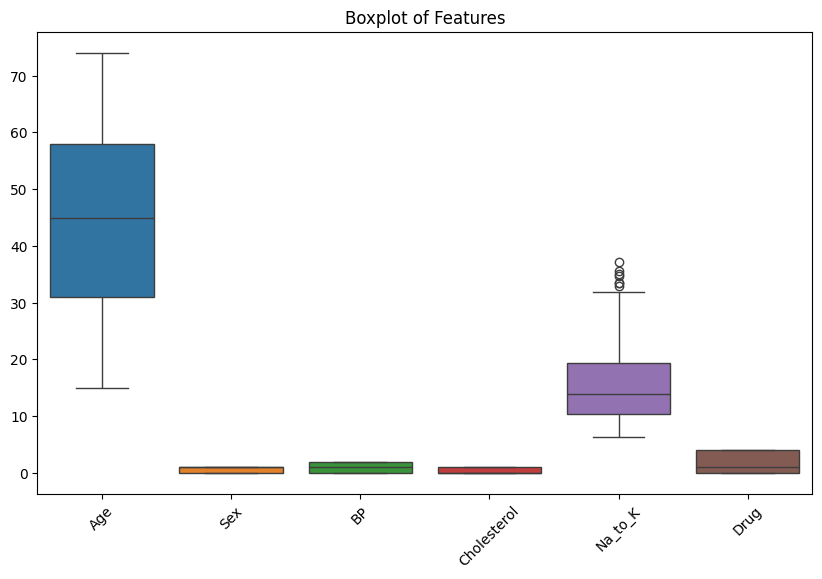

In [ ]:
# Check for outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1)
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.show()

In [ ]:

# Split the dataset into features (X) and target variable (Y)
X = df1.drop('Cholesterol', axis=1)
Y = df1['Cholesterol']


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


<Axes: >

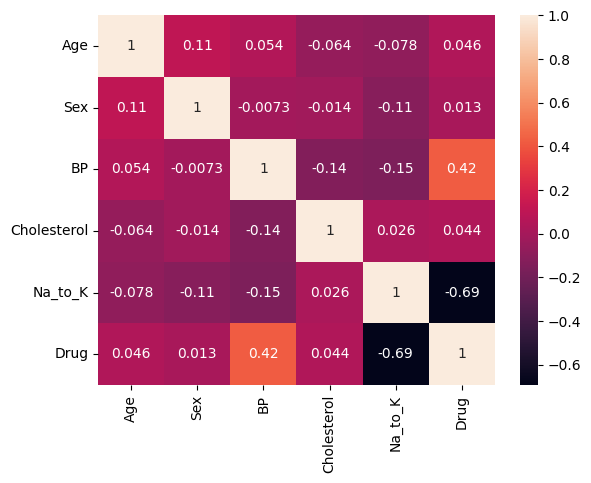

In [ ]:
corr=df1.corr()
sns.heatmap(corr,annot=True)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

# Instantiate the BernoulliNB Naive Bayes classifier
classifier = BernoulliNB()
# Train the classifier
classifier.fit(X_train, Y_train)

BernoulliNB()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0
 1 0 1]


In [ ]:
# Predict Output for a sample
sample_index = 1  # Choose any index from the test set
sample_features = X_test_scaled[sample_index].reshape(1, -1)  # Reshape the sample for prediction

predicted = classifier.predict(sample_features)

print("Sample Index:", sample_index)
print("Actual Value:", Y_test.iloc[sample_index])
print("Predicted Value:", predicted[0])


Sample Index: 1
Actual Value: 1
Predicted Value: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[14  7]
 [12  7]]


In [ ]:
accuray = accuracy_score(y_pred, Y_test)
print(accuray*100)

52.5


In [ ]:
# Classification Report
class_report = classification_report(Y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.67      0.60        21
           1       0.50      0.37      0.42        19

    accuracy                           0.53        40
   macro avg       0.52      0.52      0.51        40
weighted avg       0.52      0.53      0.51        40

